<h1> Question 1 </h1>

The first matrix is of size $n\times k$, and the second matrix is of the size $k\times m$.

The resultant matrix would be of the size $n\times m$.

Thus, we would have to calculate $nm$ entries in total.

Now, for multiplication, each entry in the resultant matrix would be a sum of $k$ different pairs that are multiplications of two numbers, thus in total $k-1$ additions per entry and $k$ multiplications per entry.

So, there will be in total $nkm$ multiplications and $n(k-1)m$ additions in performing the matrix multiplication.

<h1> Question 2 </h1>

In [9]:
# List of lists method

import numpy as np
import time

n = 10
k = 15
m = 20

np.random.seed(0)
m1 = np.random.randint(low = 1, high = 100, size=(n, k))
np.random.seed(1)
m2 = np.random.randint(low = 1, high = 100, size=(k, m))
m3 = np.zeros((n, m))
tl = np.zeros(1000)
for t in range(1000):
  st = time.perf_counter()
  for i in range(n):
    for j in range(m):
      for l in range(k):
        m3[i][j] += m1[i][l]*m2[l][j]
  en = time.perf_counter()
  tl[t] = en-st

print("Average time taken by list of lists method =", np.mean(tl))
print("Standard deviation =", np.std(tl))

#numpy inbuilt
for t in range(1000):
  st = time.perf_counter()
  m3 = np.matmul(m1, m2)
  en = time.perf_counter()
  tl[t] = en-st

print("Time taken by numpy inbuilt method =", np.mean(tl))
print("Standard deviation =", np.std(tl))

Average time taken by list of lists method = 0.0049130869880052615
Standard deviation = 0.0019622075743174696
Time taken by numpy inbuilt method = 4.267318999382041e-06
Standard deviation = 9.225653910859308e-07


It is observed that the numpy inbuilt is faster than the list-of-lists method, it might be explained by the fact that the inbuilt method would be as optimised as possible (both humanly and/or by the processor), while the list-of-lists method is just a primary implementation of the conventional school-taught algorithm, which is slow, but easy to learn and implement.

<h1> Question 3 </h1>

The one-pass-per-element method has to run for $n//2+1$ time, as the median is the $n//2+1$th highest element of the list. Each time we pass the array of length $n-k$ if we pop the highest element each time, so for large $n$, $n//2+1$ can be roughly equal to $n/2$. We run the maximum pass algorithm $n/2$ times, each time reducing the list length by $1$. So, the total passes are $n + n-1 + n-2 + ... + n-n/2 = n^2/2 - (n/2)(n/2 - 1)/2 = n^2/2 - n^2/8 - n/4 = O(n^2)$

A better method would be using the inbuilt sort() function of python, which is $O(n\cdot logn)$ (or so as told on GeeksforGeeks and StackOverFlow), then return the middle element of the array.

In [28]:
# The one-pass-per-element method

def find_median(l):
  n = len(l)
  median = 0
  if n%2 == 1:
    for i in range(n//2 + 1):
      maxidx = 0
      for j in range(n-i):
        if l[maxidx] <= l[j]:
          maxidx = j
      median = l.pop(maxidx)
  else:
    median1 = 0
    median2 = 0
    for i in range(n//2 + 1):
      maxidx = 0
      for j in range(n-i):
        if l[maxidx] <= l[j]:
          maxidx = j
      if i == n//2 - 1:
        median1 = l.pop(maxidx)
      else:
        median2 = l.pop(maxidx)
    median = (median1+median2)/2
  return median

tlist = np.zeros(1000)
np.random.seed(2)

l1 = np.random.randint(low = 1, high = 10000, size = (1000,))
for i in range(1000):
  l2 = list(l1)
  t1 = time.perf_counter()
  med = find_median(l2)
  t2 = time.perf_counter()
  tlist[i] = t2-t1
print("Average time of one-pass-per-element method =", np.mean(tlist))
print("Standard Deviation =", np.std(tlist))

# Suggested better method

l3 = l1.copy()
for i in range(1000):
  t1 = time.perf_counter()
  l3.sort()
  med2 = (l3[499]+l3[500])/2
  t2 = time.perf_counter()
  tlist[i] = t2-t1
print("Average time of suggested better method =", np.mean(tlist))
print("Standard Deviation =", np.std(tlist))

# Numpy inbuilt

for i in range(1000):
  t1 = time.perf_counter()
  med3 = np.median(l1)
  t2 = time.perf_counter()
  tlist[i] = t2-t1
print("Average time of inbuilt method =", np.mean(tlist))
print("Standard Deviation =", np.std(tlist))

Average time of one-pass-per-element method = 0.03645228615401266
Standard Deviation = 0.010801828359411762
Average time of suggested better method = 6.640932976551994e-06
Standard Deviation = 1.0699218715089924e-05
Average time of inbuilt method = 2.6438537007379638e-05
Standard Deviation = 6.281458275312372e-05


<h1> Question 4 </h1>

$f(x) = x^2y+y^3sin(x)$

$\frac{∂f}{∂x} = 2xy+y^3cos(x)$

$\frac{∂f}{∂y} = x^2+3y^2sin(x)$

<h1> Question 5 </h1>

In [32]:
import jax
jnp = jax.numpy
from jax.numpy import sin, cos

def f(vars):
  x = vars[0]
  y = vars[1]
  return x**2*y + y**3*sin(x)

coords = jnp.array([5., 6.])

# Analytical Gradient

def analytical(vars):
  x = vars[0]
  y = vars[1]
  grad = [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]
  return jnp.array(grad)

print(analytical(coords))

# JAX grad() function

jaxgrad = jax.grad(f)
print(jaxgrad(coords))

[121.271034 -78.56383 ]
[121.271034 -78.56383 ]


<h1> Question 6 </h1>

In [49]:
# Gradient using sympy

import sympy
x, y = sympy.symbols('x y')
f = x**2*y + y**3*sympy.sin(x)
sympy.diff(f, x), sympy.diff(f, y)

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

<h1> Question 7 </h1>

In [59]:
# Dictionary

datadict = {
    '2022': {
        'Branch 1': {
            'Student 1': {
                'Roll no': 1,
                'Name': 'A',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            }
        },
        'Branch 2': {
            'Student 2': {
                'Roll no': 2,
                'Name': 'B',
                'Marks': {
                    'Maths': 90,
                    'English': 72
                }
            } 
        }
    },
    '2023': {
        'Branch 1': {
            'Student 3': {
                'Roll no': 3,
                'Name': 'C',
                'Marks': {
                    'Maths': 80,
                    'English': 74
                }
            }
        },
        'Branch 2': {
            'Student 4': {
                'Roll no': 4,
                'Name': 'D',
                'Marks': {
                    'Maths': 70,
                    'English': 76
                }
            }
        }
    },
    '2024': {
        'Branch 1': {
            'Student 5': {
                'Roll no': 5,
                'Name': 'E',
                'Marks': {
                    'Maths': 60,
                    'English': 78
                }
            }
        },
        'Branch 2': {
            'Student 6': {
                'Roll no': 6,
                'Name': 'F',
                'Marks': {
                    'Maths': 50,
                    'English': 80
                }
            }
        }
    },
    '2025': {
        'Branch 1': {
            'Student 7': {
                'Roll no': 7,
                'Name': 'G',
                'Marks': {
                    'Maths': 40,
                    'English': 82
                }
            }
        },
        'Branch 2': {
            'Student 8': {
                'Roll no': 8,
                'Name': 'H',
                'Marks': {
                    'Maths': 30,
                    'English': 84
                }
            }
        }
    }
}

<h1> Question 8 </h1>

In [76]:
# The above data using classes

class Database:
  def __init__(self, ylist):
    self.years = ylist

class Year:
  def __init__(self, y, blist):
    self.year = y
    self.branches = blist

class Branch:
  def __init__(self, b, slist):
    self.branch = b
    self.students = slist

class Student:
  def __init__(self, s, n, r, m):
    self.student = s
    self.name = n
    self.roll_no = r
    self.marks = m

ylist = []
for y in datadict:
  blist = []
  for b in datadict[y]:
    slist = []
    for s in datadict[y][b]:
      slist.append(Student(s, datadict[y][b][s]['Name'], datadict[y][b][s]['Roll no'], datadict[y][b][s]['Marks']))
    blist.append(slist)
  ylist.append(blist)
data = Database(ylist)


data.years[0][0][0].name

'A'

<h1> Question 9 </h1>

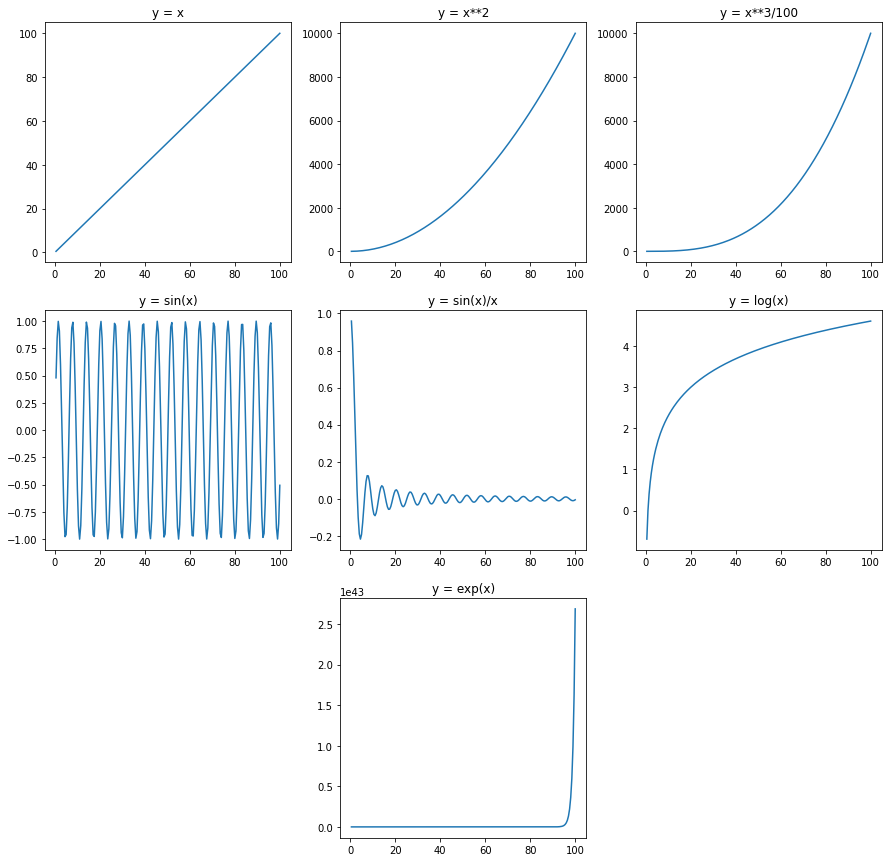

In [90]:
# Plots!!!

import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, log, exp

x = np.linspace(0.5, 100, 200)

y1 = x
y2 = x**2
y3 = x**3/100
y4 = sin(x)
y5 = sin(x)/x
y6 = log(x)
y7 = exp(x)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

plt.subplot(3, 3, 1)
plt.title('y = x')
plt.plot(x, y1)

plt.subplot(3, 3, 2)
plt.title('y = x**2')
plt.plot(x, y2)

plt.subplot(3, 3, 3)
plt.title('y = x**3/100')
plt.plot(x, y3)

plt.subplot(3, 3, 4)
plt.title('y = sin(x)')
plt.plot(x, y4)

plt.subplot(3, 3, 5)
plt.title('y = sin(x)/x')
plt.plot(x, y5)

plt.subplot(3, 3, 6)
plt.title('y = log(x)')
plt.plot(x, y6)

plt.subplot(3, 3, 8)
plt.title('y = exp(x)')
plt.plot(x, y7)

<h1> Question 10 </h1>

In [108]:
# Dataframe from array

import pandas as pd

np.random.seed(3)
m = np.random.uniform(low=1, high=2, size=(20, 5))
df = pd.DataFrame(m)
df.columns = ['a', 'b', 'c', 'd', 'e']
print(df.describe())
print()
print("Column with the highest standard deviation = a")
print('---------------------------------------------------')

df['mean'] = (df.a + df.b + df.c + df.d + df.e)/5.
print(df['mean'] == np.min(df['mean']))
print()
print("Row with the lowest mean = 15")
print('---------------------------------------------------')
del df['mean']

               a          b          c          d          e
count  20.000000  20.000000  20.000000  20.000000  20.000000
mean    1.496116   1.471558   1.440396   1.477403   1.511247
std     0.304031   0.246496   0.230858   0.296059   0.235593
min     1.029876   1.023982   1.187815   1.051467   1.100104
25%     1.263996   1.280117   1.258584   1.273296   1.364947
50%     1.493082   1.569765   1.352895   1.431530   1.470636
75%     1.739818   1.669197   1.581427   1.704508   1.677594
max     1.975995   1.708148   1.902834   1.971603   1.936384

Column with the highest standard deviation = a
---------------------------------------------------
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
Name: mean, dtype: bool

Row with the lowest mean = 15
---------------------------------------------------


<h1> Question 11 </h1>

In [114]:
# The f column

df['f'] = df.a + df.b + df.c + df.d + df.e

# The g column

def lt8(x):
  if x < 8:
    return 'LT8'
  else:
    return 'GT8'

df['g'] = df.apply(lambda r: lt8(r['f']), axis = 1)

# STD's of f grouped by value of g

lstd = np.std(df[df['g'] == 'LT8']['f'])
gstd = np.std(df[df['g'] == 'GT8']['f'])
print("STD of values smaller than 8 =", lstd)
print("STD of values greater than 8 =", gstd)

STD of values smaller than 8 = 0.5544011248693514
STD of values greater than 8 = 0.22952530573862634


<h1> Question 12 </h1>

In [126]:
# If a scalar and an array are operated, the operation is done as if the scalar
# is an array of the same shape as the other array, and is filled with the same
# value.

a = 1
b = np.array([[2, 3], [4, 5], [6, 7]])
print(a+b)
print('-------------------------------------------------------------------------')

# If a vector is operated with another array, the vector stretches in the 
# direction of the other axis.

a = np.array([1, 2, 3])
b = np.array([[1, 2, 3], [4, 5, 6]])
print(a+b)
print('-------------------------------------------------------------------------')

# If a vertical array is operated with an horizontal array or vice versa, both 
# of then stretch in the axis they are single sized and complete the operation.

a = np.array([1, 2, 3])
b = np.array([[1], [2], [3], [4]])
print(a+b)

[[3 4]
 [5 6]
 [7 8]]
-------------------------------------------------------------------------
[[2 4 6]
 [5 7 9]]
-------------------------------------------------------------------------
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]


<h1> Question 13 </h1>

In [139]:
# Defined argmin
def myargmin(arr):
  shp = arr.shape
  elem = np.product(shp)
  newarr = np.reshape(arr, (elem,))
  midx = 0
  for i in range(elem):
    if newarr[i] < newarr[midx]:
      midx = i
  return midx

a = np.array([[[1, 2, 3], [4, 0, 7], [8, 9, 10]], [[3, 4, 5], [7, 8, 9], [4, -1, 5]]])
print("Inbuit argmin gives", np.argmin(a))
print("Function myargmin gives", myargmin(a))


Inbuit argmin gives 16
Function myargmin gives 16
